ids-tcs10-hwk.ipynb: This Jupyter notebook is provided by Adalbert Wilhelm for the Theory and Case Studies part  of the module Introduction to Data Science offered in Fall 2022 at Jacobs University Bremen. Module instructors are Hilke Brockmann, Adalbert Wilhelm, and Joachim Vogt. Jupyter notebooks and other learning resources are available from a dedicated module platform.
    

# Homework assignment: Credit Risk Case Study¶

The homework assignments in this notebook supplement the lectures on Credit Risk Scoring.

    Solve the assignments according to the instructions.
    Upload the completed notebook to the module platform.
    Do not forget to enter your name in the markdown cell below.

The homework set carries a total of 20 points. Square brackets in the assignment titles specify individual point contributions.


## Name: 

Hikmat Vugarli
---

## Data background and task

An organization wants to forecast who would default on a consumer lending product. Based on demographic data and previous behaviour on paying back loans, they want to classify new customers into two risk groups (0= "not risky", 1 = "risky").
The data file `creditrisk.csv` contains demographic data of "old" customers and a target variable showing whether they have defaulted on the loan or not. 
The data file `creditrisk_newcust.csv` contains the demographic data for new customers but not the target variable. 

We start working with the data in `creditrisk.csv` to build a model that we then will deploy to the new customers.


## Preparation

Import NumPy, `pyplot` from matplotlib, and Pandas as usual.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

The following data files are expected to reside in the working directory. Identify the files on the module platform and upload them to the same folder as this Jupyter notebook.
  - `creditrisk.csv`: demographic data of "old" customers and a target variable showing whether they have defaulted on the loan or not, available from [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-in-us-dollar-world-bank).
  - `creditrisk_newcust.csv`: demographic data for new customers

## Assignment Reading the data and studying its structure (4)

Using the Pandas function `read_csv()`, the data are loaded and stored in a DataFrame.

In [37]:
data_load_old = pd.read_csv('creditrisk.csv')
data_load_new = pd.read_csv('creditrisk_newcust.csv')

Explore the structure of the data set using shape and info to answer the following questions:
  - How many observations and how many features does the data set contain?
  - How many features are numeric?
  - How many features are categorical?
  - Are there features of other data types in the data set?

In [38]:
display(data_load_old.head(11))
print(data_load_old.dtypes.astype(str).value_counts())

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


int64     7
object    6
dtype: int64


In [39]:
##observations are basically rows and features are columns, so there are 25200 observations and 13 features.
##First question
Features=len(data_load_old.axes[1])
print('The amount of observations and features the data set contain:',len(data_load_old),',', Features)
##Second question
Numeric_features=len(data_load_old._get_numeric_data().axes[1])
print('The amount of numeric features:', Numeric_features )
##axes[1] helps us to find columns, otherwise [0] will lead into only rows.
##Third question
Categorical_features=len(data_load_old.select_dtypes(include=['object']).columns.tolist())
print('The amount of categorical features:', Categorical_features)
##Fourth question
a=Features
b=Numeric_features
c=Categorical_features
if a-(b+c)==0:
    print('There are NO other data types in the data set')
else:
    print('There are other data types in the data set')

The amount of observations and features the data set contain: 252000 , 13
The amount of numeric features: 7
The amount of categorical features: 6
There are NO other data types in the data set


---
---

Check whether there are any missing values in the data set! If there are some, delete all records with missing values and use only the complete data in the following.

In [40]:
print('              The amount of NAN ')
data_load_old.isnull().sum()

              The amount of NAN 


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

---
---

### Assignment Univariate Data Exploration (8)

Apply the `describe()` method to obtain summary statistics of the DataFrame. What do you conclude?

In [41]:
data_load_old.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


1.The data represented below displaying values to high or to low
2.Experience, Income, Id and other represantives are same: 252000.000
3.In conclusion the represented data is incorrect

---
---

Now let us start looking at the numeric features first (ignoring the "Id" variable as it does not provide any relevant information for the analysis).
  - Create a dataframe with the numeric variables only.
  - Derive and report numeric summary statistics for the univariate distributions of the numerical features! 

In [42]:
df_num_var=data_load_old._get_numeric_data()
display(df_num_var)
data_load_old.isnull().sum()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,3,13,0
1,2,7574516,40,10,9,13,0
2,3,3991815,66,4,4,10,0
3,4,6256451,41,2,2,12,1
4,5,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,6,11,0
251996,251997,2843572,26,10,6,11,0
251997,251998,4522448,46,7,7,12,0
251998,251999,6507128,45,0,0,10,0


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

  - Plot histograms as meaningful graphical representations for the univariate distributions of the numerical feature!
  - What do you conclude from these summary statistics and plots? Any  specific insights?


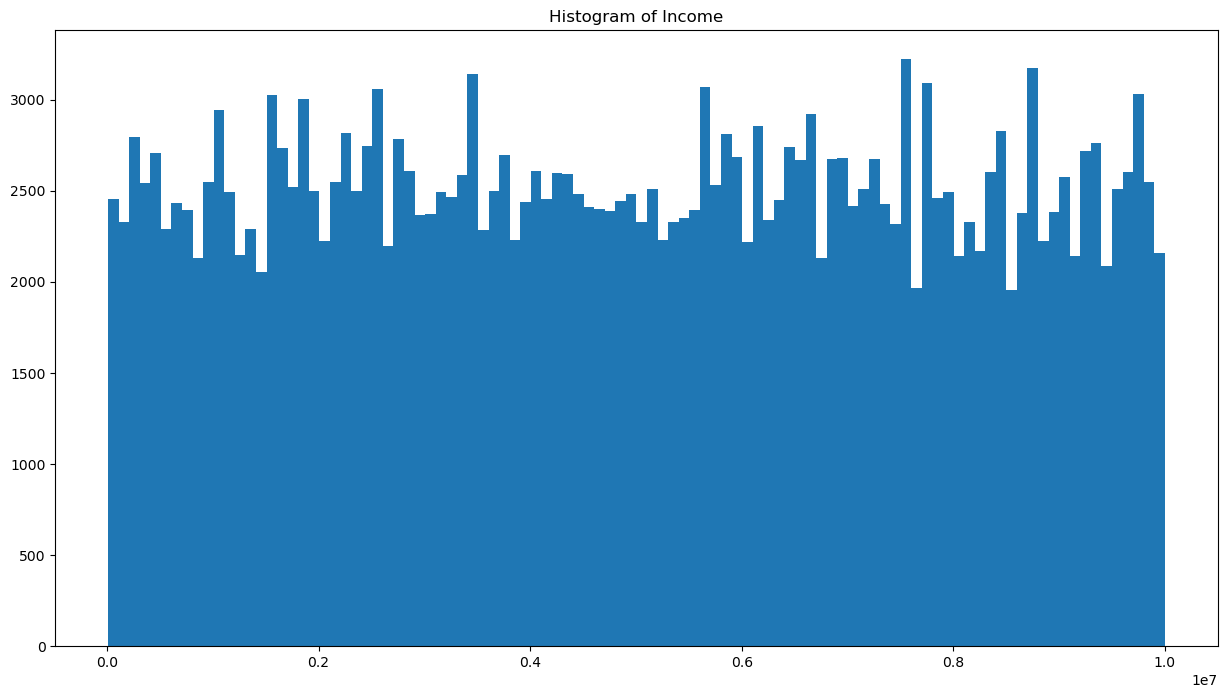

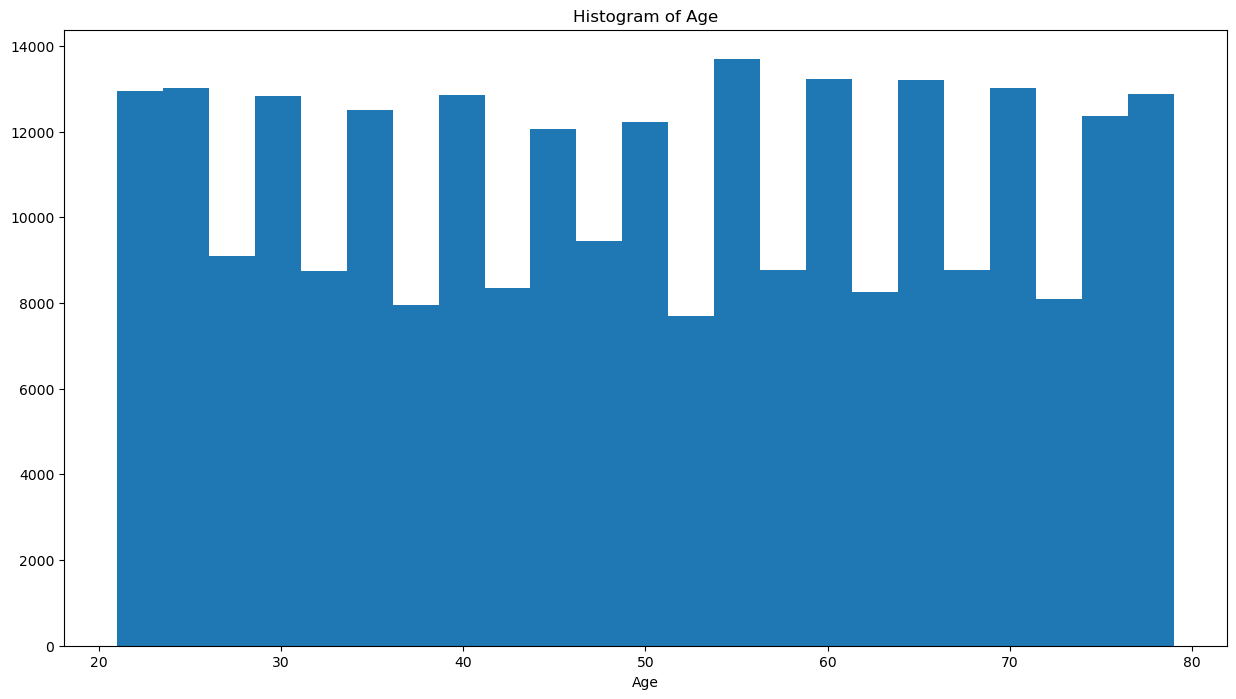

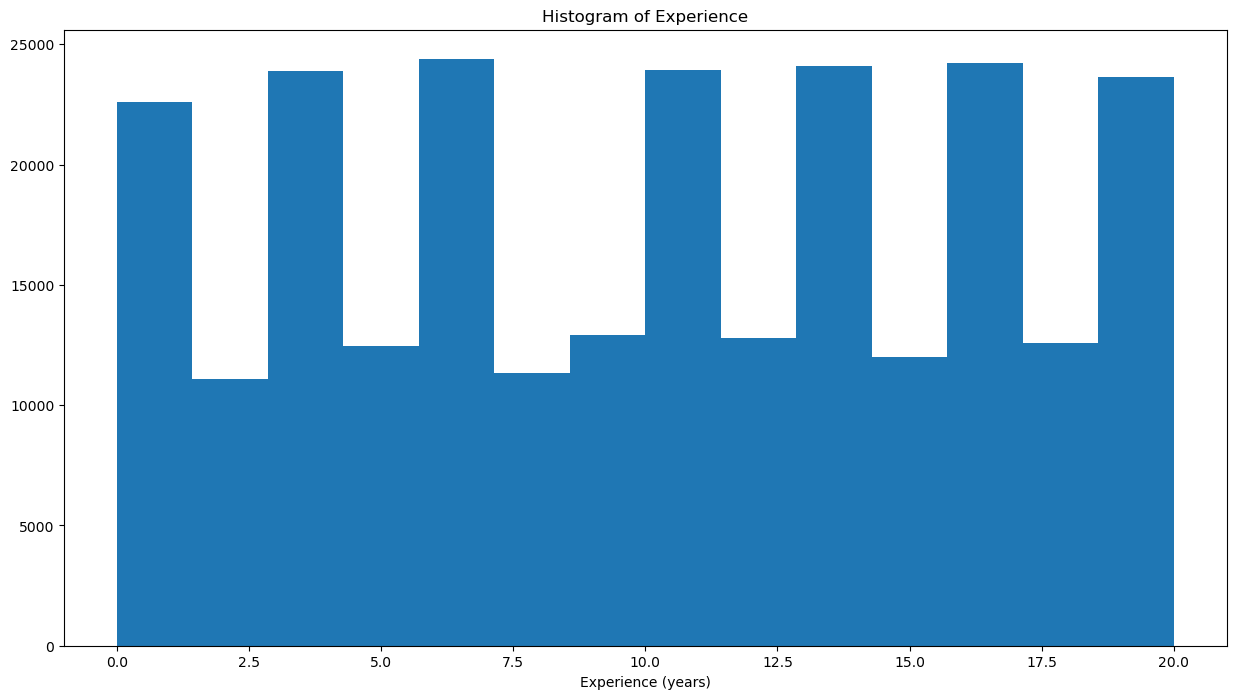

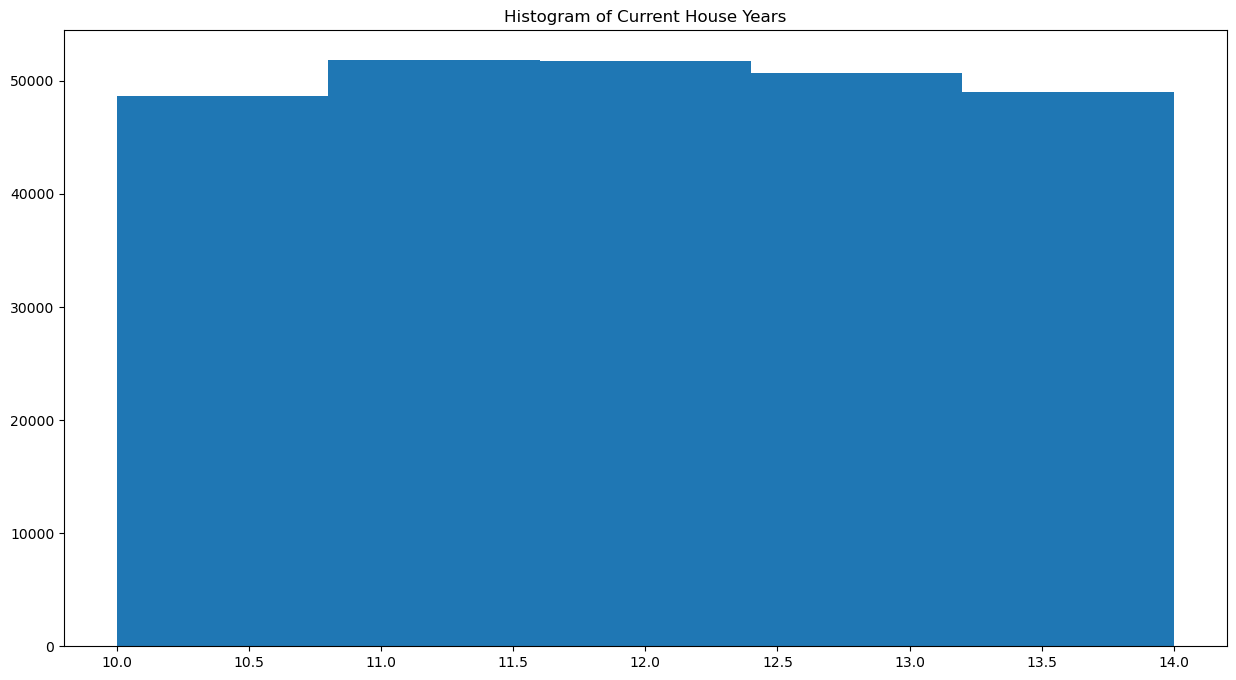

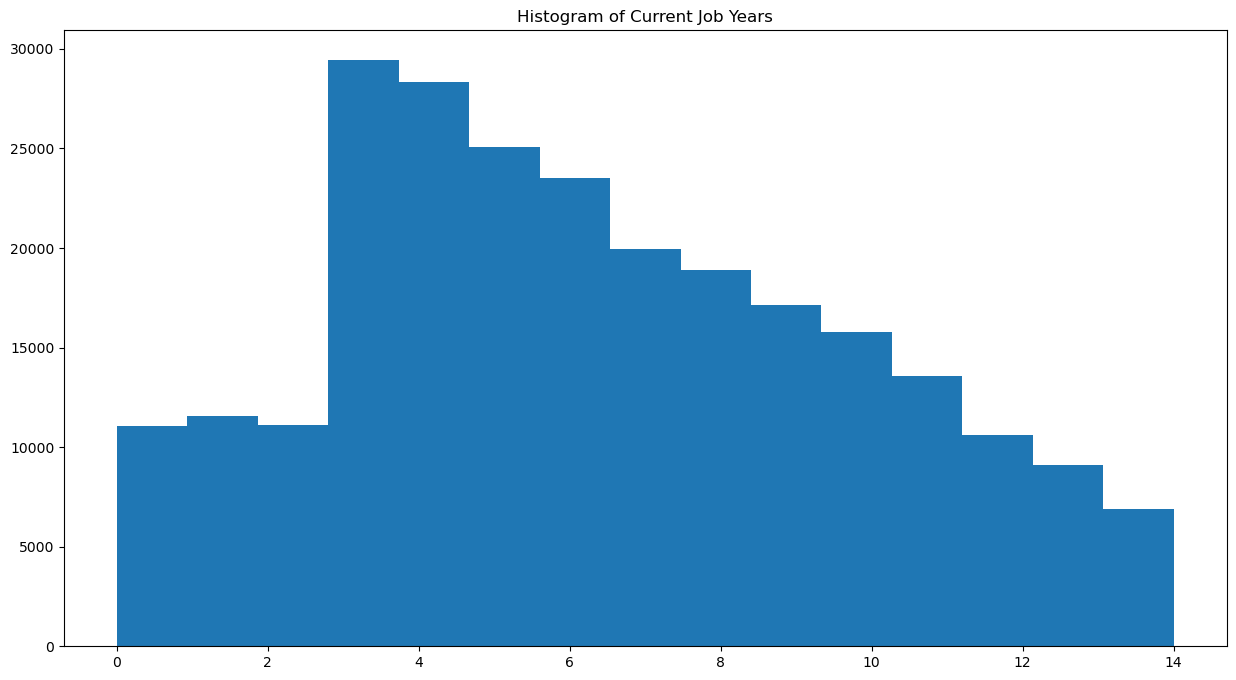

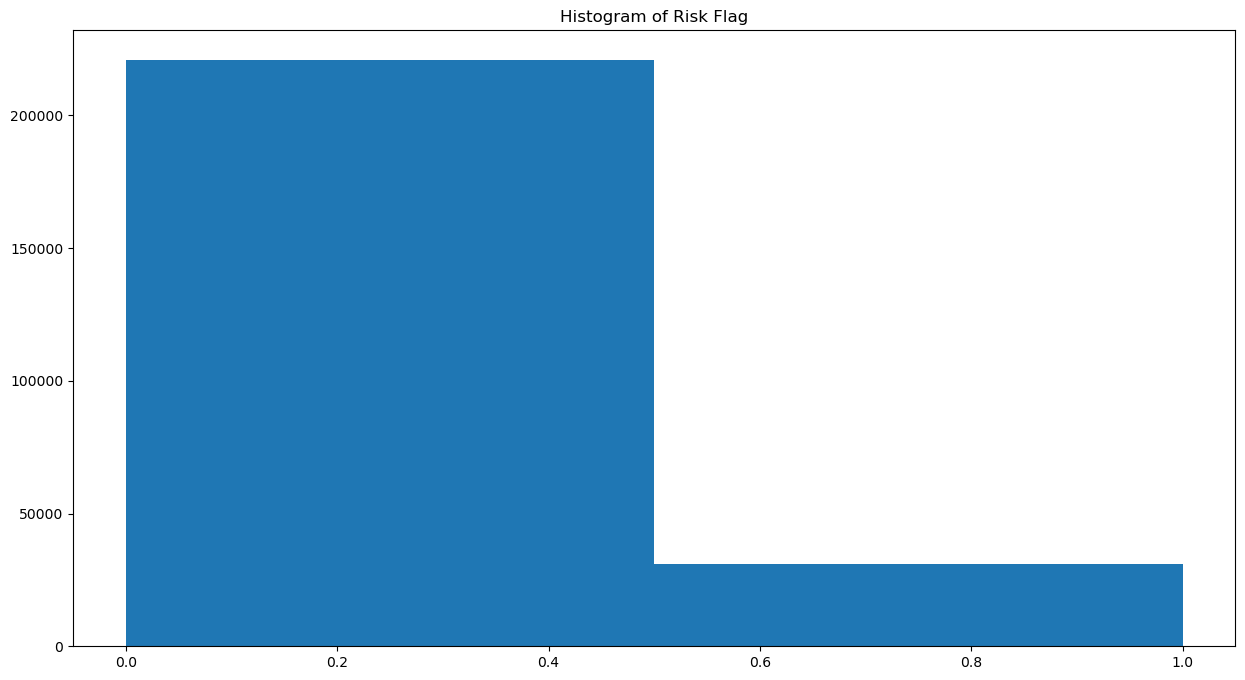

In [63]:
plt.hist(df_num_var.Income,100)
plt.title('Histogram of Income')
plt.show()
plt.hist(df_num_var.Age,23)
plt.title('Histogram of Age')
plt.xlabel('Age in years')
plt.show()
plt.hist(df_num_var.Experience,14)
plt.title('Histogram of Experience')
plt.xlabel('Experience in years')
plt.show()
plt.hist(df_num_var.CURRENT_HOUSE_YRS,5)
plt.title('Histogram of Current House Years')
plt.xlabel('House years')
plt.show()
plt.hist(df_num_var.CURRENT_JOB_YRS,15)
plt.title('Histogram of Current Job Years')
plt.xlabel('Current Job in years')
plt.show()
plt.hist(df_num_var.Risk_Flag,2)
plt.title('Histogram of Risk Flag')
plt.show()

  - Which share of customers did actually default in the past?


---
---

### Assignment Bivariate Data Exploration – numeric features (5)

Now let us look at the bivariate relationships between predictors and target feature. Compute the correlation matrix between all numeric features and visualise it with a heatmap (we recommend to use the library `Seaborn`which is a high-level API for `matplotlib`, which takes care of a lot of the manual work.). What do you conclude from this heatmap?

<AxesSubplot:>

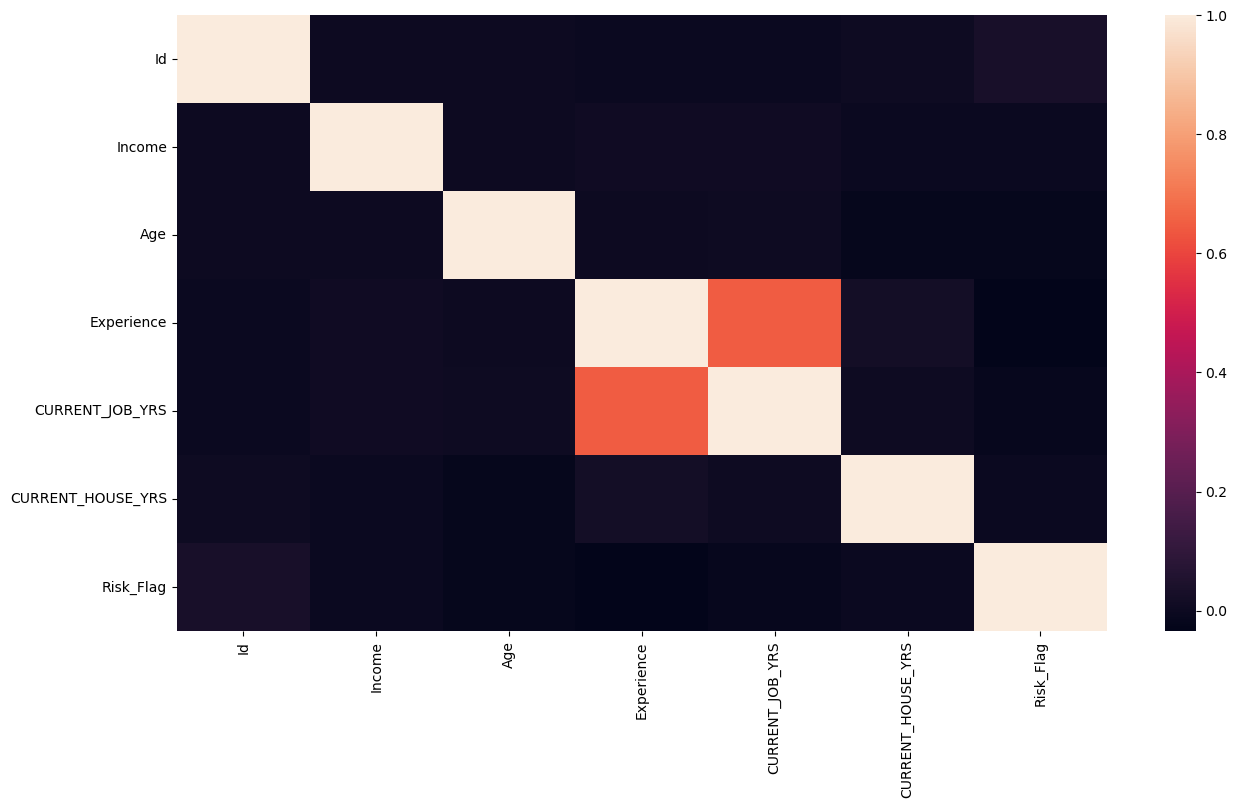

In [49]:
import seaborn as sns
corr = df_num_var.corr()
sns.heatmap(corr)


---
---

### Assignment Bivariate Data exploration – categrocial features (6)

As the next step let us look at the categorical features. 
  - Visualize their univariate distributions with bar charts. Comment on any patterns you might see!
  - Visualize the bivariate distributions between categorical predictors and the target feature by using boxplots (by groups). 
Any interesting patterns to be found?


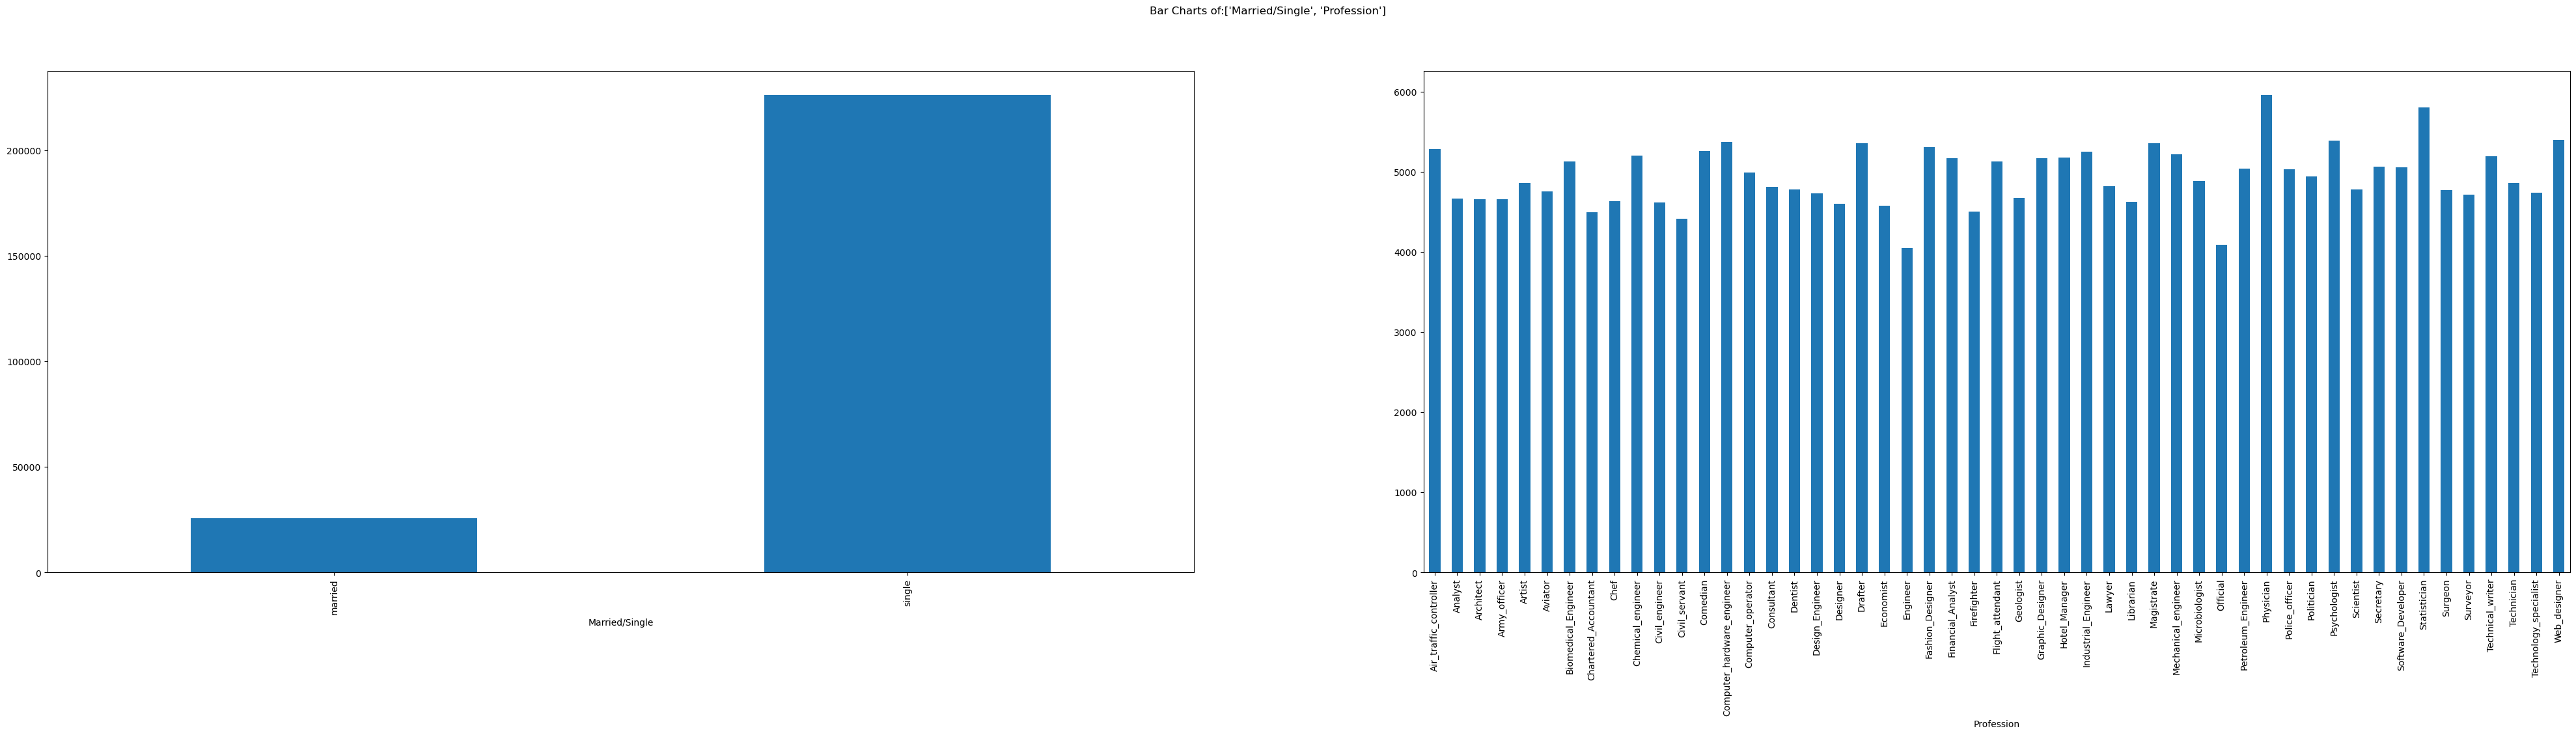

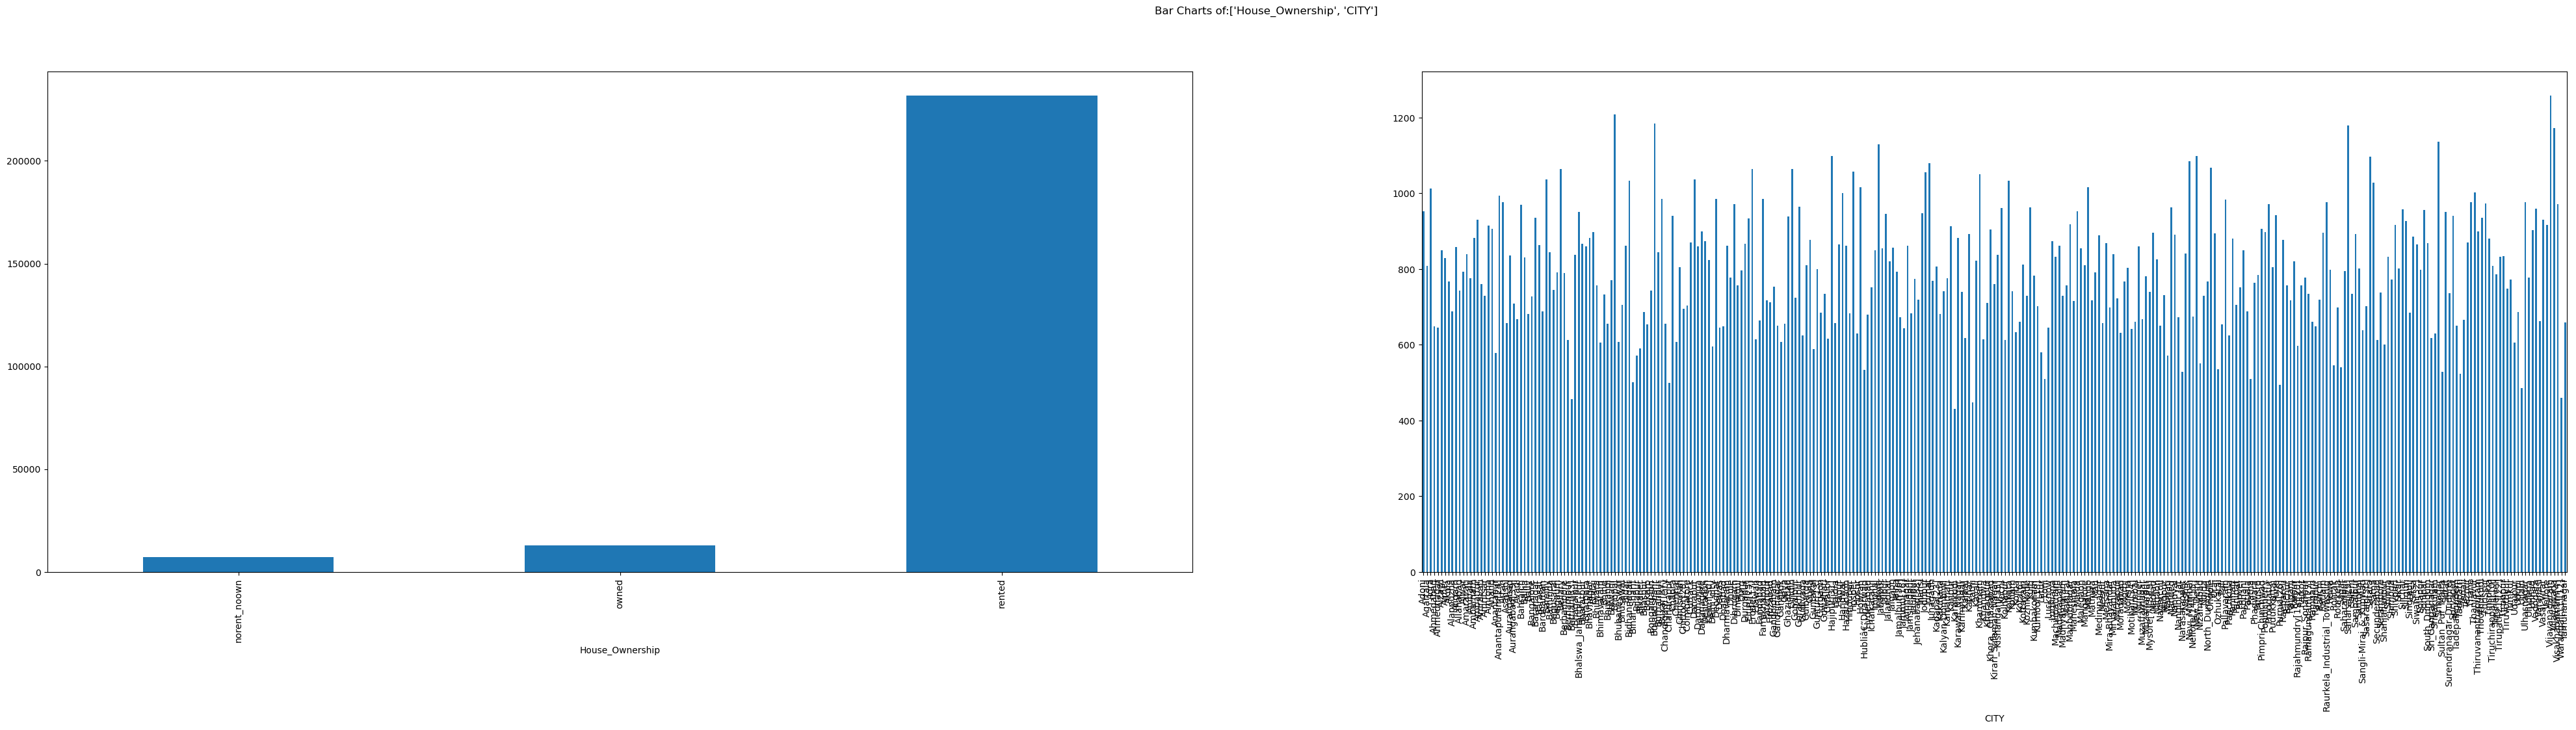

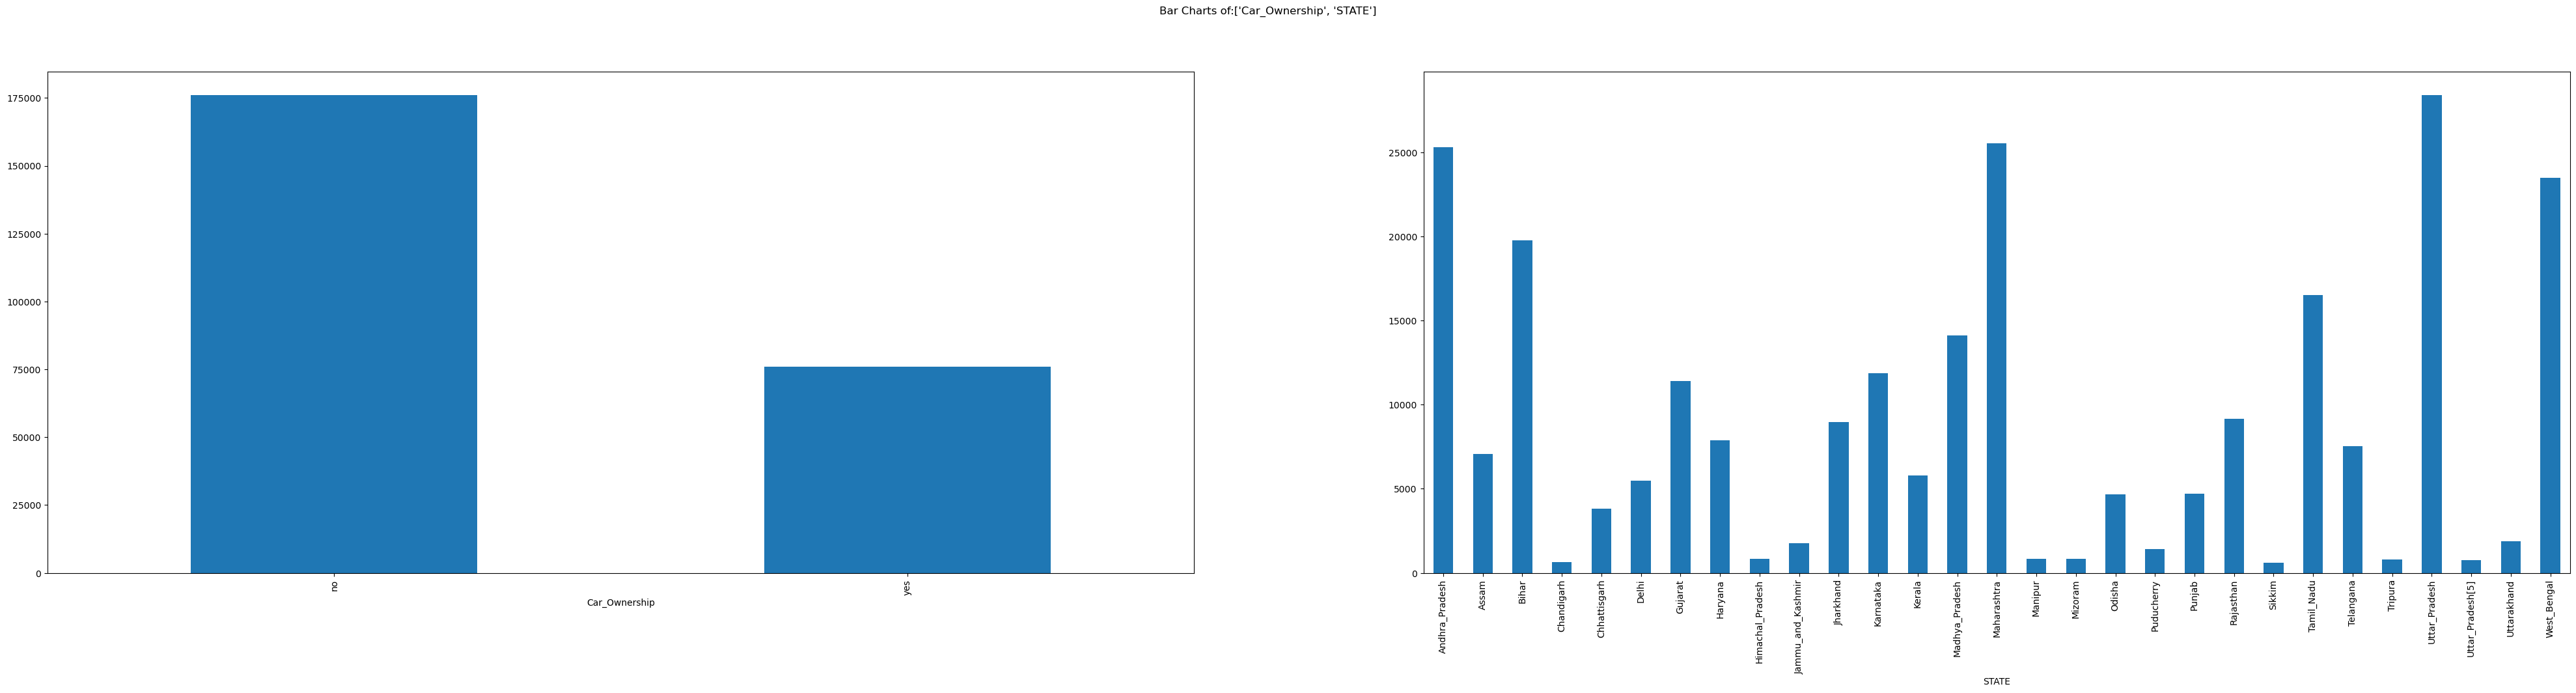

In [84]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot=plt.subplots(nrows=1 , ncols=len(colsToPlot), figsize=(50,10))
    fig.suptitle('Bar Charts of:'+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])
        
PlotBarCharts(inpData=data_load_old,
                 colsToPlot=['Married/Single', 'Profession'])
        
PlotBarCharts(inpData=data_load_old,
                 colsToPlot=['House_Ownership','CITY'])
        
PlotBarCharts(inpData=data_load_old,
                 colsToPlot=['Car_Ownership', 'STATE'])

### Assignment Encoding categorical features (2)

Now, prepare the data for modelling by encoding the string variables as numbers using hot-deck encoding.

In [99]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
data = data_load_old
values = array(data)
print(values)
#encoded int
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(array(data))
print(integer_encoded)

[[1 1303834 23 ... 3 13 0]
 [2 7574516 40 ... 9 13 0]
 [3 3991815 66 ... 4 10 0]
 ...
 [251998 4522448 46 ... 7 12 0]
 [251999 6507128 45 ... 0 10 0]
 [252000 9070230 70 ... 7 11 0]]


ValueError: y should be a 1d array, got an array of shape (252000, 13) instead.

### Assignment Train-test split (3)

In order to internally evaluate our model we split the data into training data (75\% of the available data) and test data (25\%). 
  - How many customers fall in the training data?
  - How many in the test data?

---
---

### Assignment Build a kNN classifier (9)

For $k= 11, 17, 25$  build a $k$-NN classifier for the training data and evaluate it with the test data. Show the confusion matrix for each classifier. Use the F1-measure to define the optimum $k$.

### Assignment Deploy the "best" model (3)

Deploy the resulting model to the data file `creditrisk_newcust.csv`. What will be the share of predicted defaults in this data set?


---
---